# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
#Convert list of cities into DataFrame so data can be imported from API
cities_df = pd.DataFrame({"City":cities})
cities_df.head()

,City
0,ramsgate
1,rikitea
2,kupang
3,hobart
4,kodiak


In [28]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Set up empty columns for data in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

print("Beginning Data Retrieval")
print("-"*25)

#Perform a series of successive API calls to fill DataFrame with data
for index, row in cities_df.iterrows():
    city = row["City"]
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {index} | {city}")
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found... skipping")
        pass

print("-"*25)
print("Data Retrieval Complete")
print("-"*25)

Beginning Data Retrieval
-------------------------
Processing Record 0 | ramsgate
Processing Record 1 | rikitea
Processing Record 2 | kupang
Processing Record 3 | hobart
Processing Record 4 | kodiak
Processing Record 5 | grand river south east
City not found... skipping
Processing Record 6 | mataura
Processing Record 7 | chokurdakh
Processing Record 8 | jamestown
Processing Record 9 | codrington
Processing Record 10 | busselton
Processing Record 11 | xinyu
Processing Record 12 | sao jose da coroa grande
Processing Record 13 | ponta do sol
Processing Record 14 | saint-philippe
Processing Record 15 | saldanha
Processing Record 16 | sungairaya
Processing Record 17 | bengkulu
Processing Record 18 | sept-iles
Processing Record 19 | medicine hat
Processing Record 20 | albany
Processing Record 21 | alofi
Processing Record 22 | vaini
Processing Record 23 | east london
Processing Record 24 | san patricio
Processing Record 25 | roma
Processing Record 26 | torbay
Processing Record 27 | harper
Pro

Processing Record 233 | cherskiy
Processing Record 234 | kholodnyy
Processing Record 235 | kamenskoye
City not found... skipping
Processing Record 236 | eyemouth
Processing Record 237 | lityn
Processing Record 238 | kalabo
Processing Record 239 | bur gabo
City not found... skipping
Processing Record 240 | itoman
Processing Record 241 | bireun
Processing Record 242 | fairbanks
Processing Record 243 | norwich
Processing Record 244 | auki
Processing Record 245 | provideniya
Processing Record 246 | bonthe
Processing Record 247 | marsh harbour
Processing Record 248 | kununurra
Processing Record 249 | poole
Processing Record 250 | naliya
Processing Record 251 | salalah
Processing Record 252 | nanakuli
Processing Record 253 | tuktoyaktuk
Processing Record 254 | deputatskiy
Processing Record 255 | cove
Processing Record 256 | butaritari
Processing Record 257 | romitan
Processing Record 258 | hami
Processing Record 259 | saint-pierre
Processing Record 260 | merauke
Processing Record 261 | satit

Processing Record 467 | ures
Processing Record 468 | benemerito de las americas
Processing Record 469 | nguiu
City not found... skipping
Processing Record 470 | pudozh
Processing Record 471 | belyy yar
Processing Record 472 | coquimbo
Processing Record 473 | mana
Processing Record 474 | zonguldak
Processing Record 475 | riyadh
Processing Record 476 | premia de mar
Processing Record 477 | sawtell
Processing Record 478 | kaeo
Processing Record 479 | tandil
Processing Record 480 | vanimo
Processing Record 481 | egvekinot
Processing Record 482 | durban
Processing Record 483 | sechura
Processing Record 484 | tiarei
Processing Record 485 | damietta
Processing Record 486 | loandjili
Processing Record 487 | labutta
City not found... skipping
Processing Record 488 | hirado
Processing Record 489 | sibolga
Processing Record 490 | chekhov
Processing Record 491 | sorland
Processing Record 492 | mahenge
Processing Record 493 | tessalit
Processing Record 494 | kawhia
Processing Record 495 | ciudad gu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
cities_df.count()

City          619
Cloudiness    619
Country       619
Date          619
Humidity      619
Lat           619
Lng           619
Max Temp      619
Wind Speed    619
dtype: int64

In [30]:
#Convert empty cells to NaN
# Googled how to do this and using regular expressions was the most common solution
cities_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

#Drop empty rows
cities_df = cities_df.dropna(axis = 0, how ='any')

#Convert column types to floats for analysis/plotting
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(float)
cities_df["Humidity"] = cities_df["Humidity"].astype(float)
cities_df["Lat"] = cities_df["Lat"].astype(float)
cities_df["Lng"] = cities_df["Lng"].astype(float)
cities_df["Max Temp"] = cities_df["Max Temp"].astype(float)
cities_df["Wind Speed"] = cities_df["Wind Speed"].astype(float)

#Preview dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ramsgate,47.0,GB,1.578861e+09,93.0,51.34,1.42,46.40,11.41
1,rikitea,4.0,PF,1.578861e+09,80.0,-23.12,-134.97,76.51,17.07
2,kupang,87.0,ID,1.578861e+09,78.0,-10.17,123.58,82.85,17.72
3,hobart,20.0,AU,1.578860e+09,62.0,-42.88,147.33,63.00,12.75
4,kodiak,90.0,US,1.578861e+09,86.0,57.79,-152.41,33.80,8.05


In [57]:
#Save as csv
cities_df.to_csv("output_data/cities_weather_data.csv", encoding="utf-8", index=False)

#Preview Dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ramsgate,47.0,GB,1.578861e+09,93.0,51.34,1.42,46.40,11.41
1,rikitea,4.0,PF,1.578861e+09,80.0,-23.12,-134.97,76.51,17.07
2,kupang,87.0,ID,1.578861e+09,78.0,-10.17,123.58,82.85,17.72
3,hobart,20.0,AU,1.578860e+09,62.0,-42.88,147.33,63.00,12.75
4,kodiak,90.0,US,1.578861e+09,86.0,57.79,-152.41,33.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

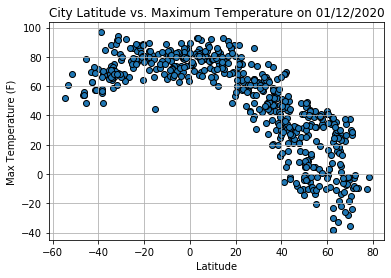

In [32]:
#Build scatter plot
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

#Make plot pretty and readable
plt.title("City Latitude vs. Maximum Temperature on 01/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/lat_vs_temp.png")

#This code is building a scatter plot showing any possible relationship between latitude of a city and its maximum temperature
#It appears that as latitude increases, maximum temperature decreases

#### Latitude vs. Humidity Plot

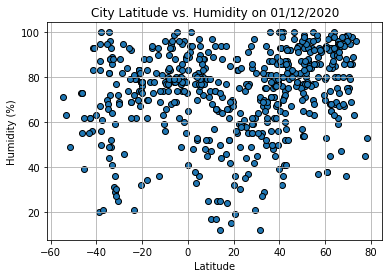

In [33]:
#Build plot
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

#Make plot pretty and readable
plt.title("City Latitude vs. Humidity on 01/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/lat_vs_humid.png")

#This code is building a scatter plot showing any possible relationship between latitude of a city and its humidity
#There appears to be no obvious relationship between laititude and humidity.  Humidity is fairly evenly spread across
# all latitudes.

#### Latitude vs. Cloudiness Plot

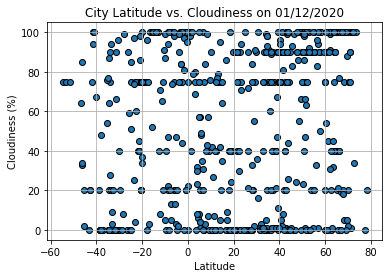

In [34]:
#Build plot
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

#Make plot pretty and readable
plt.title("City Latitude vs. Cloudiness on 01/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/lat_vs_cloud.png")

#This code is building a scatter plot showing any possible relationship between latitude of a city and its % of cloud cover
#There appears to be no obvious relationship between laititude and cloud cover.  Cloud cover is fairly evenly spread across
# all latitudes.

#### Latitude vs. Wind Speed Plot

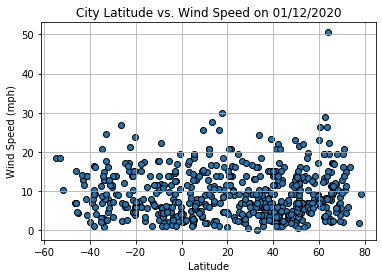

In [35]:
#Build plot
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

#Make plot pretty and readable
plt.title("City Latitude vs. Wind Speed on 01/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/lat_vs_wind.png")

#This code is building a scatter plot showing any possible relationship between latitude of a city and wind speed
#There appears to be no obvious relationship between laititude and wind speed.  Wind speed is fairly evenly spread across
# all latitudes.

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress_plot(x_values, y_values, x_label, y_label):

    # Perform a linear regression on temperature vs. latitude
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

    # Get regression values
    regression_values = x_values * slope + intercept
    
    # Create line equation string
    line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Annotate the line equation
    plt.annotate(line_equation, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Create Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"City {x_label} vs. {y_label} on 01/12/2020")

    # Print r square value
    print(f"The r-squared is: {rvalue}")
    
    return plt

In [37]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere_df = cities_df.loc[cities_df["Lat"] >= 0, :]
south_hemisphere_df = cities_df.loc[cities_df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8367013112871602


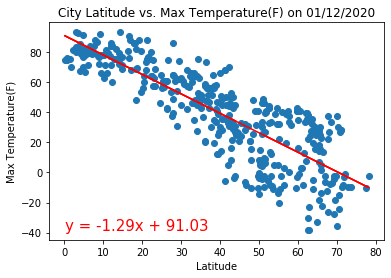

In [47]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(north_hemisphere_df["Lat"], north_hemisphere_df["Max Temp"], "Latitude", "Max Temperature(F)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/north_lat_vs_temp.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4401407356222895


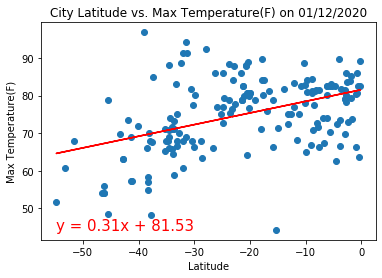

In [48]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(south_hemisphere_df["Lat"], south_hemisphere_df["Max Temp"], "Latitude", "Max Temperature(F)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/south_lat_vs_temp.png")

# Show plot
plt.show()

In [ ]:
# Analysis of Latitude vs. Max Temp
# There is a strong negative correlation between latitude and max temp in the Northern Hemisphere (model accounts for 84% of variation)
# As latitude increases, max temp decreases
# There is a weak positive correlation between latitude and max temp in the Southern Hemisphere (model accounts for 44% of variation)
# As latitude increases, max temp slightly increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30894946591741757


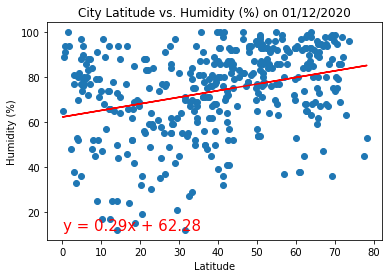

In [49]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(north_hemisphere_df["Lat"], north_hemisphere_df["Humidity"], "Latitude", "Humidity (%)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/north_lat_vs_humid.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2856055385756779


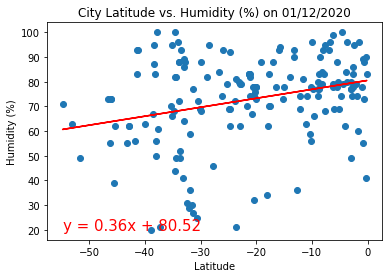

In [50]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(south_hemisphere_df["Lat"], south_hemisphere_df["Humidity"], "Latitude", "Humidity (%)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/south_lat_vs_humid.png")

# Show plot
plt.show()

In [ ]:
# Analysis of Latitude vs. Humidity
# There is a weak positive correlation between latitude and humidity in the Northern Hemisphere (model accounts for 31% of variation)
# As latitude increases, humidity slightly increases
# There is no correlation between latitude and humidity in the Southern Hemisphere (model accounts for only 29% of variation)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22069873462706188


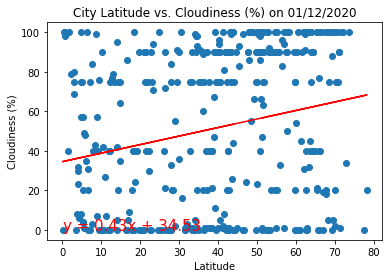

In [51]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(north_hemisphere_df["Lat"], north_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/north_lat_vs_cloud.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2826327678819504


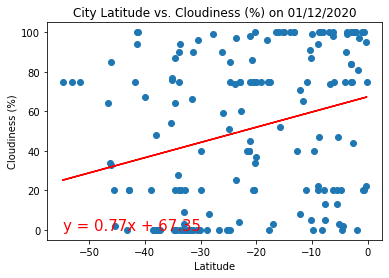

In [52]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(south_hemisphere_df["Lat"], south_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/south_lat_vs_cloud.png")

# Show plot
plt.show()

In [ ]:
# Analysis of Latitude vs. Cloudiness
# There is no correlation between latitude and cloudiness in the Northern Hemisphere (model accounts for only 22% of variation)
# As latitude increases, cloudiness slightly increases
# There is no correlation between latitude and cloudiness in the Southern Hemisphere (model accounts for only 28% of variation)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05170634591616213


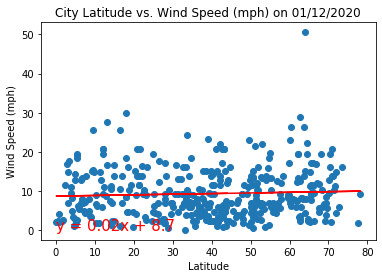

In [53]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(north_hemisphere_df["Lat"], north_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (mph)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/north_lat_vs_wind.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.16005933858836208


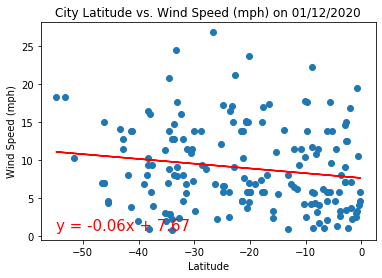

In [54]:
#Call linear regression plot function
temp_vs_lat = linear_regress_plot(south_hemisphere_df["Lat"], south_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (mph)")

#Save figure in output_data folder
plt.savefig("../WeatherPy/output_data/south_lat_vs_wind.png")

# Show plot
plt.show()

In [ ]:
# Analysis of Latitude vs. Wind Speed
# There is no correlation between latitude and wind speed in the Northern Hemisphere (model accounts for only 5% of variation)
# As latitude increases, humidity slightly increases
# There is no correlation between latitude and wind speed in the Southern Hemisphere (model accounts for only 16% of variation)